In [326]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from networkx.algorithms import community
import gzip

In [329]:
def analyze_graph(G, name="Graph"):
    print(f"--- {name} ---")
    print("Number of nodes:", G.number_of_nodes())
    print("Number of edges:", G.number_of_edges())

    degrees = [d for n, d in G.degree()]
    print("Average degree:", np.mean(degrees))
    print("Max degree:", np.max(degrees))
    print("Min degree:", np.min(degrees))

    if nx.is_connected(G):
        avg_path = nx.average_shortest_path_length(G)
        print("Average shortest path length:", avg_path)
    else:
        print("Graph is disconnected, cannot compute average shortest path")

    clustering_coeff = nx.average_clustering(G)
    print("Average clustering coefficient:", clustering_coeff)

    # Linear degree distribution
    plt.figure()
    plt.hist(degrees, bins=range(min(degrees), max(degrees)+2), edgecolor='black', alpha=0.7)
    plt.title(f"Degree distribution of {name} (linear scale)")
    plt.xlabel("Degree")
    plt.ylabel("Count")
    plt.show()

    # Log-log degree distribution (power-law check)
    degree_counts = np.bincount(degrees)
    degree_values = np.arange(len(degree_counts))
    nonzero = degree_counts > 0

    plt.figure()
    plt.scatter(degree_values[nonzero], degree_counts[nonzero], color='blue', alpha=0.6)
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Degree k (log scale)')
    plt.ylabel('Number of nodes with degree k (log scale)')
    plt.title(f"Degree distribution of {name} (log-log)")
    plt.show()

    # Draw graph
    plt.figure(figsize=(6,6))
    nx.draw(G, with_labels=True, node_color='skyblue', node_size=500, edge_color='gray')
    plt.title(name)
    plt.show()

    # Community Structure
    print("\nCommunity structure:")
    # Using greedy modularity optimization (good balance between speed & accuracy)
    communities = list(community.greedy_modularity_communities(G))
    num_communities = len(communities)
    modularity = community.modularity(G, communities)
    print(f"Detected {num_communities} communities")
    print(f"Modularity: {modularity:.4f}")

    # Assign community ID to each node
    community_map = {}
    for cid, comm in enumerate(communities):
        for node in comm:
            community_map[node] = cid
    nx.set_node_attributes(G, community_map, "community")

    # Draw graph with community colors
    plt.figure(figsize=(6, 6))
    pos = nx.spring_layout(G, seed=42)
    colors = [community_map[n] for n in G.nodes()]
    nx.draw(G, pos, with_labels=True, node_color=colors,
            cmap=plt.cm.Set3, node_size=500, edge_color='gray')
    plt.title(f"{name} (Communities)")
    plt.show()


In [333]:
def save_loglog_degree_plot(G, name="graph_name", save_path="./figures/"):
    """
    Plots and saves a log-log degree distribution of the given NetworkX graph.

    Parameters:
        G (nx.Graph): The graph to analyze.
        name (str): Name of the graph (used in the title and filename).
        save_path (str): Directory path to save the figure.
    """
    # Ensure directory exists
    import os
    os.makedirs(save_path, exist_ok=True)

    # Compute degree frequencies
    degrees = [deg for _, deg in G.degree()]
    degree_count = np.bincount(degrees)
    degrees_nonzero = np.nonzero(degree_count)[0]
    counts = degree_count[degrees_nonzero]

    # Plot log–log distribution
    plt.figure(figsize=(6, 4))
    plt.loglog(degrees_nonzero, counts, 'bo', markersize=4, alpha=0.7)
    plt.title(f"Log-Log Degree Distribution: {name}")
    plt.xlabel("Degree (k)")
    plt.ylabel("Frequency p(k)")
    plt.grid(True, which="both", ls="--", linewidth=0.5)
    
    # Save figure as high-resolution PNG and PDF
    plt.tight_layout()
    plt.savefig(f"{save_path}{name}_loglog.png", dpi=300)
    plt.savefig(f"{save_path}{name}_loglog.pdf", dpi=300)
    plt.close()

    print(f"Saved log-log degree plot for {name} in {save_path}")

In [327]:
def load_facebook_graph(file_path="facebook_combined.txt.gz"):
    """
    Load the Facebook combined dataset from a .txt.gz file and return a NetworkX Graph.
    Each line in the file represents an undirected edge between two users.
    """
    G = nx.Graph()
    
    with gzip.open(file_path, 'rt') as f:  # 'rt' means text mode
        for line in f:
            u, v = map(int, line.strip().split())
            G.add_edge(u, v)
    
    print(f"Graph loaded: {G.number_of_nodes()} nodes, {G.number_of_edges()} edges")
    return G



In [82]:
# first iteration
def ualis(n, a, d):
    G = nx.Graph()
    alpha = a  # power-law exponent a usually 2.5
    k_min = 1     # minimum k value
    k_max = n  # maximum k value
    damp = d # damping factor d usually 0.85
    
    time = 0 #unused var
    
    
    for i in range (0,n):
        if i == n//3: 
            time += 1
        if i == (n//3)*2: 
            time += 1

        new_colour = random.random()

        if time == 0:
            if new_colour < 1/3:
                G.add_node(i, color = 'red')
            elif new_colour < 2/3:
                G.add_node(i, color = 'blue')
            else: 
                G.add_node(i, color = 'yellow')
                
        if time == 1:
            if new_colour < 1/3:
                G.add_node(i, color = 'purple')
            elif new_colour < 2/3:
                G.add_node(i, color = 'green')
            else: 
                G.add_node(i, color = 'orange')
                
        if time == 2:
            if new_colour < 1/6:
                G.add_node(i, color = 'red-purple')
            elif new_colour < 2/6:
                G.add_node(i, color = 'blue-purple')
            elif new_colour < 3/6:
                G.add_node(i, color = 'blue-green')
            elif new_colour < 4/6:
                G.add_node(i, color = 'yellow-green')
            elif new_colour < 5/6:
                G.add_node(i, color = 'red-orange')
            else: 
                G.add_node(i, color = 'yellow-orange')

        for j in range(0, len(G)):
            if i == j: continue
            if G.nodes[j]['color'] == G.nodes[i]['color']:
                probability = (i+1)**(-alpha) + 0.5
                if probability > random.random():
                    G.add_edge(i,j)

            elif G.nodes[j]['color'] in G.nodes[i]['color'] or G.nodes[i]['color'] in G.nodes[j]['color']:
                probability = (i+1)**(-alpha) + 0.25
                if probability > random.random():
                    G.add_edge(i,j)
            else:
                probability = 0.1
                if probability > random.random():
                    G.add_edge(i,j)

    return G

In [144]:
#second iteration assuming quaternary colours
def ualis(n, c):
    G = nx.Graph()
    alpha = 2.5  # power-law exponent a usually 2.5
    k_min = 1     # minimum k value
    k_max = n  # maximum k value
    damp = 0.85 # damping factor d usually 0.85
    colours = 3*(2**(c-1)) # c-ary colours (primary, secondary, etc)
    colour_list = [[0,1,2,3]]
    #weights = [0.5]
    weights = [0.013, 0.023, 0.047, 0.13, 0.736]
    time = 0 #unused var
    
    for i in range (0,c):
        options = [x for x in range(1, 3*(2**i) + 1)]
        options = [i+1] + options
     #   weights = [1/(i+4)] + weights  # probabilities sum to 1 (or can be relative)

        colour_list += [options]
        
    for i in range (0,n):
        # Pick one element based on weights
        colour_range = random.choices(colour_list, weights=weights, k=1)[0]
        wheel = colour_range[0]
        new_colour = random.choice(colour_range[1:])
       
        G.add_node(i, color = new_colour, wheel = wheel) # in a matrix, i = node number, jk = new_colour|wheel side by side ex. A_(1,01)
        

        for j in range(0, len(G)):
            if i == j: continue
            if G.nodes[j]['color'] == G.nodes[i]['color']:
                probability = 1/2 # close to b-day effect with quaternary
                if probability > random.random():
                    G.add_edge(i,j)

            elif G.nodes[i]['wheel'] < G.nodes[j]['wheel']:
                if G.nodes[i]['wheel'] == 0:
                    probability = 1/3 + (i+1)**(-alpha)
                elif G.nodes[i]['wheel'] == 1:
                    probability = 1/6 + (i+1)**(-alpha)
                elif G.nodes[i]['wheel'] == 2:
                    probability = 1/12 + (i+1)**(-alpha)
                else: 
                    probability = 1/24 + (i+1)**(-alpha)
                    
                if probability > random.random():
                    G.add_edge(i,j)
            else:
                probability = 0.01
                if probability > random.random():
                    G.add_edge(i,j)

    return G

In [330]:
#third iteration
def ualis(n, c):
    G = nx.Graph()
    alpha = 2.5  # power-law exponent a usually 2.5
    k_min = 1     # minimum k value
    k_max = n  # maximum k value
    damp = 0.85 # damping factor d usually 0.85
    colours = 3*(2**(c-1)) # c-ary colours (primary, secondary, etc)
    colour_list = [[0,1,2,3]]
    #weights = [0.5]
    weights = [0.013, 0.023, 0.047, 0.13, 0.736]
    time = 0 #unused var
    
    for i in range (0,c):
        options = [x for x in range(1, 3*(2**i) + 1)]
        options = [i+1] + options
     #   weights = [1/(i+4)] + weights  # probabilities sum to 1 (or can be relative)

        colour_list += [options]
        
    for i in range (0,n):
        # Pick one element based on weights
        colour_range = random.choices(colour_list, weights=weights, k=1)[0]
        wheel = colour_range[0]
        new_colour = random.choice(colour_range[1:])
       
        G.add_node(i, color = new_colour, wheel = wheel) # in a matrix, i = node number, jk = new_colour|matrix side by side ex. A_(1,01)
        

        for j in range(0, len(G)):
            if i == j: continue
            if G.nodes[j]['color'] == G.nodes[i]['color']:
                probability = 0.736 # close to b-day effect with quaternary
                if probability > random.random():
                    G.add_edge(i,j)

            elif G.nodes[i]['wheel'] < G.nodes[j]['wheel']:
                if G.nodes[i]['wheel'] == 0:
                    probability = 0.13
                elif G.nodes[i]['wheel'] == 1:
                    probability = 0.047
                elif G.nodes[i]['wheel'] == 2:
                    probability = 0.023
                else: 
                    probability = 0.013
                    
                if probability > random.random():
                    G.add_edge(i,j)
            else:
                probability = 0.01
                if probability > random.random():
                    G.add_edge(i,j)

    return G

In [238]:
#fourth iteration; try 5 instead of 3 for -ary formula
def ualis(n, c):
    G = nx.Graph()
    alpha = 2.5  # power-law exponent a usually 2.5
    k_min = 1     # minimum k value
    k_max = n  # maximum k value
    damp = 0.85 # damping factor d usually 0.85
    colours = 5*(2**(c-1)) # c-ary colours (primary, secondary, etc)
    colour_list = [[0,1,2,3,4,5]]
    #weights = [0.5]
    weights = [0.013, 0.023, 0.047, 0.13, 0.736]
    time = 0 #unused var
    
    for i in range (0,c):
        options = [x for x in range(1, 5*(2**i) + 1)]
        options = [i+1] + options
     #   weights = [1/(i+4)] + weights  # probabilities sum to 1 (or can be relative)

        colour_list += [options]
        
    for i in range (0,n):
        # Pick one element based on weights
        colour_range = random.choices(colour_list, weights=weights, k=1)[0]
        wheel = colour_range[0]
        new_colour = random.choice(colour_range[1:])
       
        G.add_node(i, color = new_colour, wheel = wheel) # in a matrix, i = node number, jk = new_colour|wheel side by side ex. A_(1,01)
        

        for j in range(0, len(G)):
            if i == j: continue
            if G.nodes[j]['color'] == G.nodes[i]['color']:
                probability = 0.736 # close to b-day effect with quaternary
                if probability > random.random():
                    G.add_edge(i,j)

            elif G.nodes[i]['wheel'] < G.nodes[j]['wheel']:
                if G.nodes[i]['wheel'] == 0:
                    probability = 0.736
                elif G.nodes[i]['wheel'] == 1:
                    probability = 0.13
                elif G.nodes[i]['wheel'] == 2:
                    probability = 0.047
                elif G.nodes[i]['wheel'] == 3:
                    probability = 0.023
                else: 
                    probability = 0.013
                    
                if probability > random.random():
                    G.add_edge(i,j)
            else:
                probability = 0.01
                if probability > random.random():
                    G.add_edge(i,j)

    return G

In [240]:
#fifth iteration
def ualis(n, c):
    G = nx.Graph()
    alpha = 2.5  # power-law exponent a usually 2.5
    k_min = 1     # minimum k value
    k_max = n  # maximum k value
    damp = 0.85 # damping factor d usually 0.85
    colours = 3*(2**(c-1)) # c-ary colours (primary, secondary, etc)
    colour_list = [[0,1,2,3]]
    #weights = [0.5]
    weights = [0.013, 0.023, 0.047, 0.13, 0.736]
    time = 0 #unused var
    
    for i in range (0,c):
        options = [x for x in range(1, 3*(2**i) + 1)]
        options = [i+1] + options
     #   weights = [1/(i+4)] + weights  # probabilities sum to 1 (or can be relative)

        colour_list += [options]
        
    for i in range (0,n):
        # Pick one element based on weights
        colour_range = random.choices(colour_list, weights=weights, k=1)[0]
        wheel = colour_range[0]
        new_colour = random.choice(colour_range[1:])
       
        G.add_node(i, color = new_colour, wheel = wheel) # in a matrix, i = node number, jk = new_colour|wheel side by side ex. A_(1,01)
        

        for j in range(0, len(G)):
            if i == j: continue
            if G.nodes[j]['color'] == G.nodes[i]['color']:
                probability = 0.5
                if probability > random.random():
                    G.add_edge(i,j)

            elif G.nodes[i]['wheel'] < G.nodes[j]['wheel']:
                if G.nodes[i]['wheel'] == 0:
                    probability = 0.736
                elif G.nodes[i]['wheel'] == 1:
                    probability = 0.13
                elif G.nodes[i]['wheel'] == 2:
                    probability = 0.047
                elif G.nodes[i]['wheel'] == 3:
                    probability = 0.023
                else: 
                    probability = 0.013
                    
                if probability > random.random():
                    G.add_edge(i,j)
            else:
                probability = 0.001
                if probability > random.random():
                    G.add_edge(i,j)

    return G

In [251]:
#sixth iteration;
def ualis(n, c):
    G = nx.Graph()
    alpha = 2.5  # power-law exponent a usually 2.5
    k_min = 1     # minimum k value
    k_max = n  # maximum k value
    damp = 0.85 # damping factor d usually 0.85
    colours = 5*(2**(c-1)) # c-ary colours (primary, secondary, etc)
    colour_list = [[0,1,2,3,4,5]]
    #weights = [0.5]
    weights = [0.013, 0.023, 0.047, 0.13, 0.736]
    time = 0 #unused var
    
    for i in range (0,c):
        options = [x for x in range(1, 5*(2**i) + 1)]
        options = [i+1] + options
     #   weights = [1/(i+4)] + weights  # probabilities sum to 1 (or can be relative)

        colour_list += [options]
        
    for i in range (0,n):
        # Pick one element based on weights
        colour_range = random.choices(colour_list, weights=weights, k=1)[0]
        wheel = colour_range[0]
        new_colour = random.choice(colour_range[1:])
       
        G.add_node(i, color = new_colour, wheel = wheel) # in a matrix, i = node number, jk = new_colour|wheel side by side ex. A_(1,01)
        

        for j in range(0, len(G)):
            if i == j: continue
            if G.nodes[j]['color'] == G.nodes[i]['color']:
                probability = (i**(-alpha))*0.736
                if probability > random.random():
                    G.add_edge(i,j)

            elif G.nodes[i]['wheel'] < G.nodes[j]['wheel']:
                if G.nodes[i]['wheel'] == 0:
                    if G.nodes[j]['wheel'] == 1:
                        probability = (i**(-alpha))*0.023
                    elif G.nodes[j]['wheel'] == 2:
                        probability = (i**(-alpha))*0.047
                    elif G.nodes[j]['wheel'] == 3:
                        probability = (i**(-alpha))*0.13
                    else:
                        probability = (i**(-alpha))*0.736
                elif G.nodes[i]['wheel'] == 1:
                    probability = (i**(-alpha))*0.13
                elif G.nodes[i]['wheel'] == 2:
                    probability = (i**(-alpha))*0.047
                elif G.nodes[i]['wheel'] == 3:
                    probability = (i**(-alpha))*0.023
                else: 
                    probability = (i**(-alpha))*0.013
                    
                if probability > random.random():
                    G.add_edge(i,j)
            else:
                probability = (i**(-alpha))*0.01
                if probability > random.random():
                    G.add_edge(i,j)

    return G

In [261]:
#seventh iteration;
def ualis(n, c):
    G = nx.Graph()
    alpha = 2.5  # power-law exponent a usually 2.5
    k_min = 1     # minimum k value
    k_max = n  # maximum k value
    damp = 0.85 # damping factor d usually 0.85
    colours = 5*(2**(c-1)) # c-ary colours (primary, secondary, etc)
    colour_list = [[0,1,2,3,4,5]]
    #weights = [0.5]
    weights = [0.013, 0.023, 0.047, 0.13, 0.736]
    time = 0 #unused var
    
    for i in range (0,c):
        options = [x for x in range(1, 5*(2**i) + 1)]
        options = [i+1] + options
     #   weights = [1/(i+4)] + weights  # probabilities sum to 1 (or can be relative)

        colour_list += [options]
        
    for i in range (0,n):
        # Pick one element based on weights
        colour_range = random.choices(colour_list, weights=weights, k=1)[0]
        wheel = colour_range[0]
        new_colour = random.choice(colour_range[1:])
       
        G.add_node(i, color = new_colour, wheel = wheel) # in a matrix, i = node number, jk = new_colour|wheel side by side ex. A_(1,01)
        

        for j in range(0, len(G)):
            if i == j: continue
            if G.nodes[j]['color'] == G.nodes[i]['color']:
                probability = (k_min**(-alpha))*1.736
                if probability > random.random():
                    G.add_edge(i,j)

            elif G.nodes[i]['wheel'] < G.nodes[j]['wheel']:
                if G.nodes[i]['wheel'] == 0:
                    if G.nodes[j]['wheel'] == 1:
                        probability = ((0.023*k_min)**(-alpha))
                    elif G.nodes[j]['wheel'] == 2:
                        probability = ((0.047*k_min)**(-alpha))
                    elif G.nodes[j]['wheel'] == 3:
                        probability = ((0.13*k_min)**(-alpha))
                    else:
                        probability = ((0.736*k_min)**(-alpha))
                elif G.nodes[i]['wheel'] == 1:
                    probability = ((0.13*k_min)**(-alpha))
                elif G.nodes[i]['wheel'] == 2:
                    probability = ((0.047*k_min)**(-alpha))
                elif G.nodes[i]['wheel'] == 3:
                    probability = ((0.736*k_min)**(-alpha))
                else: 
                    probability = (i**(-alpha))
                    
                if probability > random.random():
                    G.add_edge(i,j)
            else:
                probability = (k_max**(-alpha))
                if probability > random.random():
                    G.add_edge(i,j)

    return G

In [267]:
#eighth iteration
def ualis(n, c):
    G = nx.Graph()
    alpha = 2.5  # power-law exponent a usually 2.5
    k_min = 1     # minimum k value
    k_max = n  # maximum k value
    damp = 0.85 # damping factor d usually 0.85
    colours = 3*(2**(c-1)) # c-ary colours (primary, secondary, etc)
    colour_list = [[0,1,2,3]]
    #weights = [0.5]
    weights = [0.013, 0.023, 0.047, 0.13, 0.736]
    time = 0 #unused var
    
    for i in range (0,c):
        options = [x for x in range(1, 3*(2**i) + 1)]
        options = [i+1] + options
     #   weights = [1/(i+4)] + weights  # probabilities sum to 1 (or can be relative)

        colour_list += [options]
        
    for i in range (0,n//3):
        # Pick one element based on weights
        colour_range = random.choices(colour_list, weights=weights, k=1)[0]
        wheel = colour_range[0]
        new_colour = random.choice(colour_range[1:])
       
        G.add_node(i, color = new_colour, wheel = wheel) # in a matrix, i = node number, jk = new_colour|matrix side by side ex. A_(1,01)

        for j in range(0, len(G)):
            if i == j: continue
            if G.nodes[j]['color'] == G.nodes[i]['color']:
                probability = (j+1)**(-alpha)
                if probability > random.random():
                    G.add_edge(i,j)

            elif G.nodes[i]['wheel'] < G.nodes[j]['wheel']:    
                probability = (j+1)**(-alpha) * ((i+1)**((G.nodes[j]['wheel'])))
                    
                if probability > random.random():
                    G.add_edge(i,j)
            else:
                probability = 1/n
                if probability > random.random():
                    G.add_edge(i,j)

    colour_list = []
    for i in range (0,c):
        options = [x for x in range(3*(2**i) + 1, 2*3*(2**i) + 1)]
        options = [i+1] + options
     #   weights = [1/(i+4)] + weights  # probabilities sum to 1 (or can be relative)

        colour_list += [options]
        
    for i in range (n//3,2*n//3):
        # Pick one element based on weights
        colour_range = random.choices(colour_list, weights=weights, k=1)[0]
        wheel = colour_range[0]
        new_colour = random.choice(colour_range[1:])
       
        G.add_node(i, color = new_colour, wheel = wheel) # in a matrix, i = node number, jk = new_colour|matrix side by side ex. A_(1,01)

        for j in range(0, len(G)):
            if i == j: continue
            if G.nodes[j]['color'] == G.nodes[i]['color']:
                probability = (j+1)**(-alpha)
                if probability > random.random():
                    G.add_edge(i,j)

            elif G.nodes[i]['wheel'] < G.nodes[j]['wheel']:    
                probability = (j+1)**(-alpha) * ((i+1)**((G.nodes[j]['wheel'])))
                    
                if probability > random.random():
                    G.add_edge(i,j)
            else:
                probability = 1/n
                if probability > random.random():
                    G.add_edge(i,j)

    colour_list = []
    for i in range (0,c):
        options = [x for x in range(2*3*(2**i) + 1, 3*3*(2**i) + 1)]
        options = [i+1] + options
     #   weights = [1/(i+4)] + weights  # probabilities sum to 1 (or can be relative)

        colour_list += [options]
        
    for i in range (2*n//3,n):
        # Pick one element based on weights
        colour_range = random.choices(colour_list, weights=weights, k=1)[0]
        wheel = colour_range[0]
        new_colour = random.choice(colour_range[1:])
       
        G.add_node(i, color = new_colour, wheel = wheel) # in a matrix, i = node number, jk = new_colour|matrix side by side ex. A_(1,01)
        
    
        for j in range(0, len(G)):
            if i == j: continue
            if G.nodes[j]['color'] == G.nodes[i]['color']:
                probability = (j+1)**(-alpha)
                if probability > random.random():
                    G.add_edge(i,j)

            elif G.nodes[i]['wheel'] < G.nodes[j]['wheel']:    
                probability = (j+1)**(-alpha) * ((i+1)**((G.nodes[j]['wheel'])))
                    
                if probability > random.random():
                    G.add_edge(i,j)
            else:
                probability = 1/n
                if probability > random.random():
                    G.add_edge(i,j)

    return G

In [299]:
#ninth iteration based off of third's good results: high C, low shortpath, too many edges though
def ualis(n, c):
    G = nx.Graph()
    alpha = 2.5  # power-law exponent a usually 2.5
    k_min = 1     # minimum k value
    k_max = n  # maximum k value
    damp = 0.85 # damping factor d usually 0.85
    colours = 3*(2**(c-1)) # c-ary colours (primary, secondary, etc)
    colour_list = [[0,1,2,3]]
    #weights = [0.5]
    weights = [0.013, 0.023, 0.047, 0.13, 0.736]
    time = 0 #unused var
    
    for i in range (0,c):
        options = [x for x in range(1, 3*(2**i) + 1)]
        options = [i+1] + options
     #   weights = [1/(i+4)] + weights  # probabilities sum to 1 (or can be relative)

        colour_list += [options]
        
    for i in range (0,n):
        # Pick one element based on weights
        colour_range = random.choices(colour_list, weights=weights, k=1)[0]
        wheel = colour_range[0]
        new_colour = random.choice(colour_range[1:])
       
        G.add_node(i, color = new_colour, wheel = wheel) # in a matrix, i = node number, jk = new_colour|matrix side by side ex. A_(1,01)
        

        for j in range(0, len(G)):
            if i == j: continue
            if G.nodes[j]['color'] == G.nodes[i]['color']:
                probability = (j+1)**(-alpha)
                if probability > random.random():
                    G.add_edge(i,j)

            elif G.nodes[j]['wheel'] < G.nodes[i]['wheel'] and G.nodes[j]['wheel'] == 0:    
                probability = (j+1)**(-alpha) * ((3*(2**(G.nodes[i]['wheel']-1)))/colours)
                    
                if probability > random.random():
                    G.add_edge(i,j)
            else:
                probability = colours/n
                if probability > random.random():
                    G.add_edge(i,j)

    return G

In [307]:
#tenth iteration
def ualis(n, c):
    G = nx.Graph()
    alpha = 2.5  # power-law exponent a usually 2.5
    k_min = 1     # minimum k value
    k_max = n  # maximum k value
    damp = 0.85 # damping factor d usually 0.85
    colours = 3*(2**(c-1)) # c-ary colours (primary, secondary, etc)
    colour_list = [[0,1,2,3]]
    #weights = [0.5]
    weights = [0.013, 0.023, 0.047, 0.13, 0.736]
    time = 0 #unused var
    
    for i in range (0,c):
        options = [x for x in range(1, 3*(2**i) + 1)]
        options = [i+1] + options
     #   weights = [1/(i+4)] + weights  # probabilities sum to 1 (or can be relative)

        colour_list += [options]
        
    for i in range (0,n):
        # Pick one element based on weights
        colour_range = random.choices(colour_list, weights=weights, k=1)[0]
        wheel = colour_range[0]
        new_colour = random.choice(colour_range[1:])
       
        G.add_node(i, color = new_colour, wheel = wheel) # in a matrix, i = node number, jk = new_colour|matrix side by side ex. A_(1,01)
        

        for j in range(0, len(G)):
            if i == j: continue
            if G.nodes[j]['color'] == G.nodes[i]['color']:
                probability = 1/8 # close to b-day effect with quaternary
                if probability > random.random():
                    G.add_edge(i,j)

            elif G.nodes[j]['wheel'] <= G.nodes[i]['wheel'] and G.nodes[j]['wheel'] == 0:    
                if G.nodes[i]['wheel'] == 0:
                    probability = 0.013
                elif G.nodes[i]['wheel'] == 1:
                    probability = 0.023
                elif G.nodes[i]['wheel'] == 2:
                    probability = 0.047
                else: 
                    probability = 0.13
                    
                if probability > random.random():
                    G.add_edge(i,j)
            else:
                probability = colours/n
                if probability > random.random():
                    G.add_edge(i,j)

    return G

In [305]:
#eleventh iteration
def ualis(n, c):
    G = nx.Graph()
    alpha = 2.5  # power-law exponent a usually 2.5
    k_min = 1     # minimum k value
    k_max = n  # maximum k value
    damp = 0.85 # damping factor d usually 0.85
    colours = 3*(2**(c-1)) # c-ary colours (primary, secondary, etc)
    colour_list = [[0,1,2,3]]
    #weights = [0.5]
    weights = [0.013, 0.023, 0.047, 0.13, 0.736]
    time = 0 #unused var
    
    for i in range (0,c):
        options = [x for x in range(1, 3*(2**i) + 1)]
        options = [i+1] + options
     #   weights = [1/(i+4)] + weights  # probabilities sum to 1 (or can be relative)

        colour_list += [options]
        
    for i in range (0,n):
        # Pick one element based on weights
        colour_range = random.choices(colour_list, weights=weights, k=1)[0]
        wheel = colour_range[0]
        new_colour = random.choice(colour_range[1:])
       
        G.add_node(i, color = new_colour, wheel = wheel) # in a matrix, i = node number, jk = new_colour|matrix side by side ex. A_(1,01)
        

        for j in range(0, len(G)):
            if i == j: continue
            if G.nodes[j]['color'] == G.nodes[i]['color']:
                probability = 0.736 * 0.5
                if probability > random.random():
                    G.add_edge(i,j)

            elif G.nodes[i]['wheel'] < G.nodes[j]['wheel']:
                if G.nodes[i]['wheel'] == 0:
                    probability = 0.13 
                elif G.nodes[i]['wheel'] == 1:
                    probability = 0.047
                elif G.nodes[i]['wheel'] == 2:
                    probability = 0.023
                else: 
                    probability = 0.013
                    
                if probability > random.random():
                    G.add_edge(i,j)
            else:
                probability = (colours/n)
                if probability > random.random():
                    G.add_edge(i,j)

    return G

--- Colour Combination Collision ---
Number of nodes: 4000
Number of edges: 366694
Average degree: 183.347
Max degree: 683
Min degree: 100
Average shortest path length: 1.9801089022255565
Average clustering coefficient: 0.39827936037533546


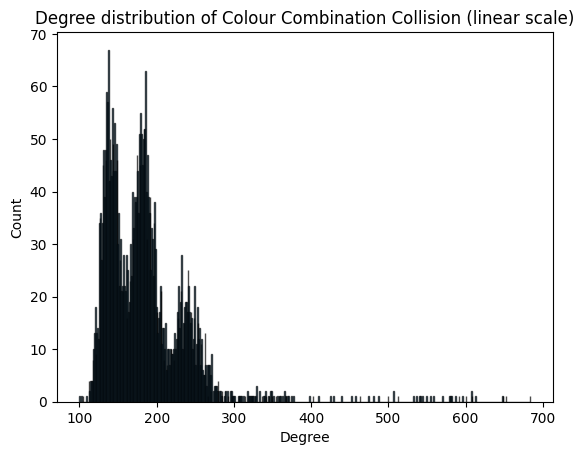

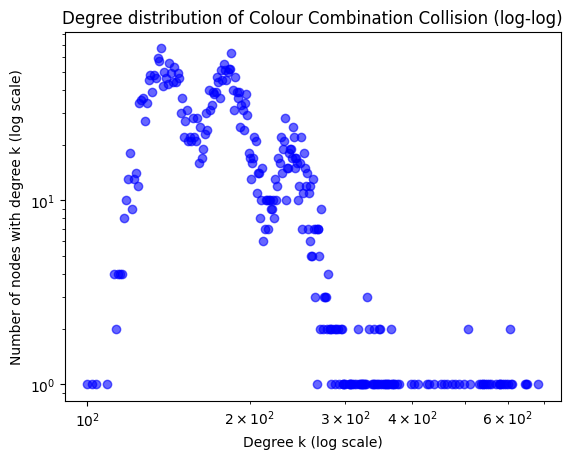

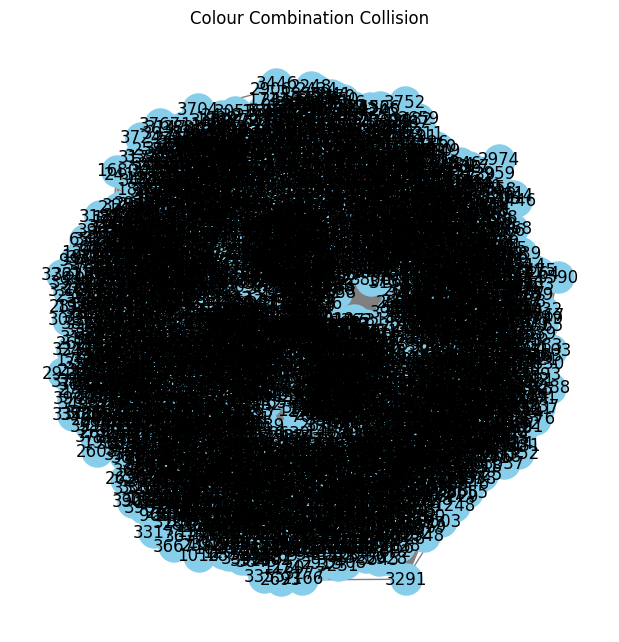


Community structure:
Detected 15 communities
Modularity: 0.6430


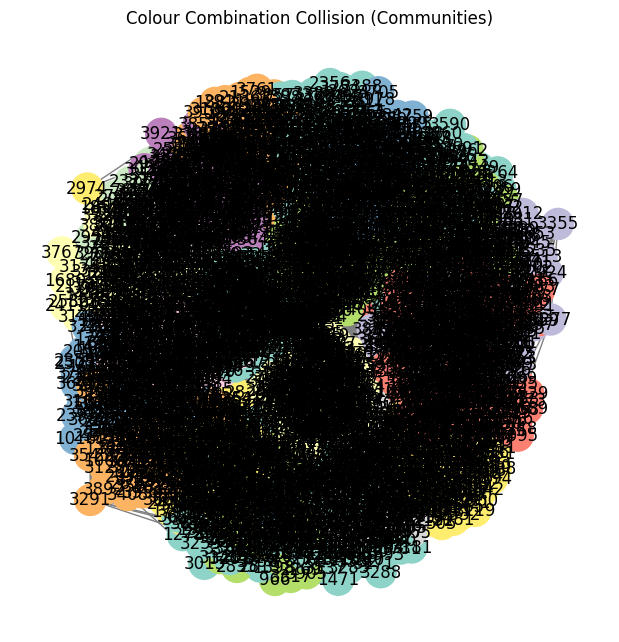

--- Erdős–Rényi Graph ---
Number of nodes: 4000
Number of edges: 799690
Average degree: 399.845
Max degree: 480
Min degree: 323
Average shortest path length: 1.9000137534383597
Average clustering coefficient: 0.09999146848471749


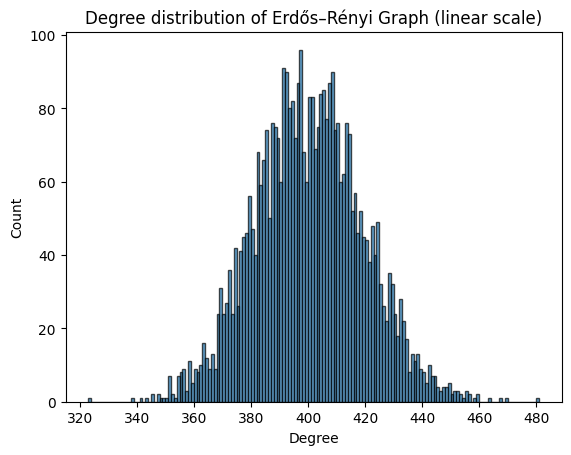

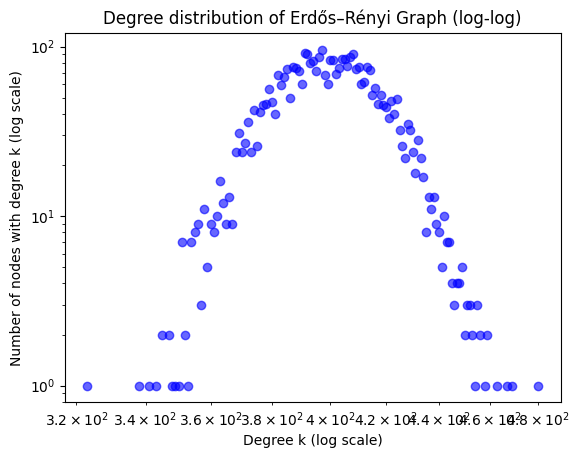

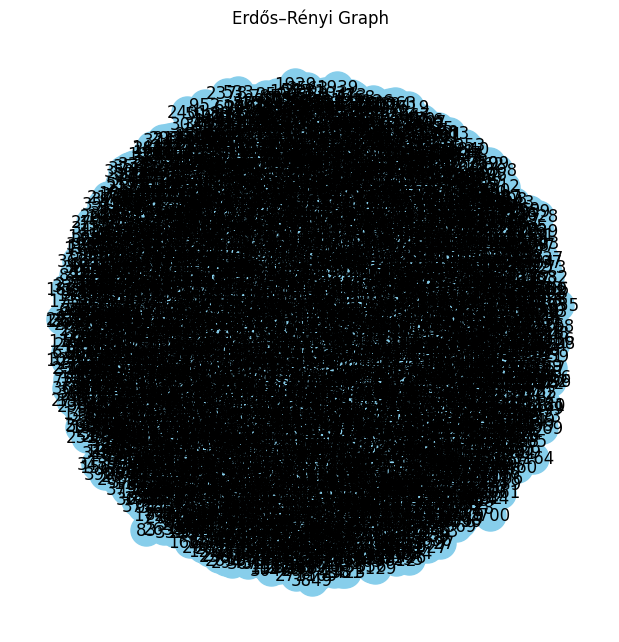


Community structure:
Detected 3 communities
Modularity: 0.0330


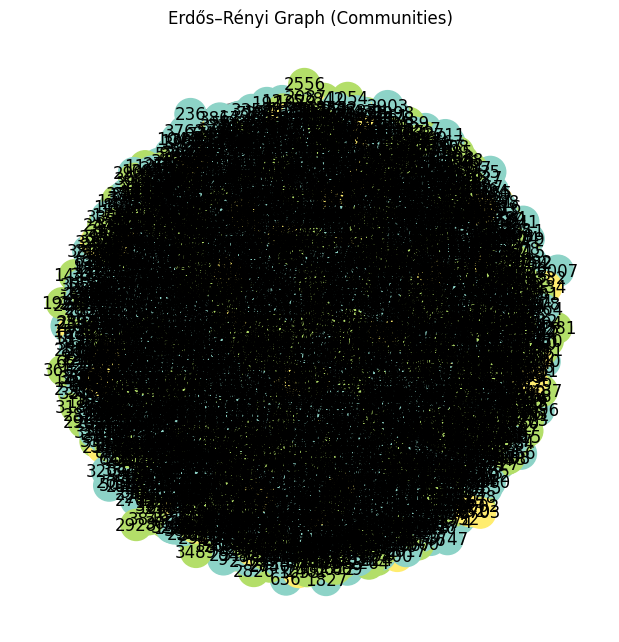

--- Barabási–Albert Graph ---
Number of nodes: 4000
Number of edges: 7996
Average degree: 3.998
Max degree: 149
Min degree: 2
Average shortest path length: 4.632695548887222
Average clustering coefficient: 0.010449458216477876


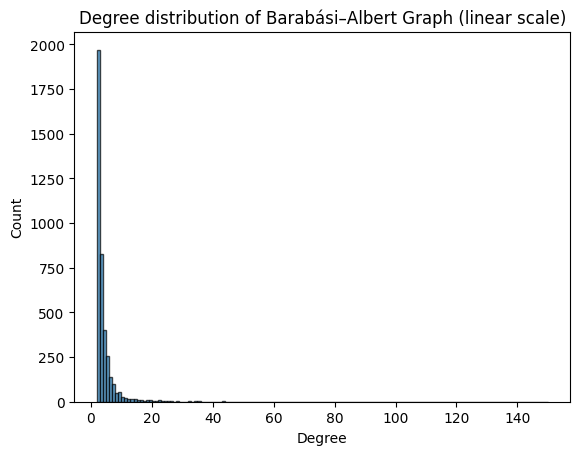

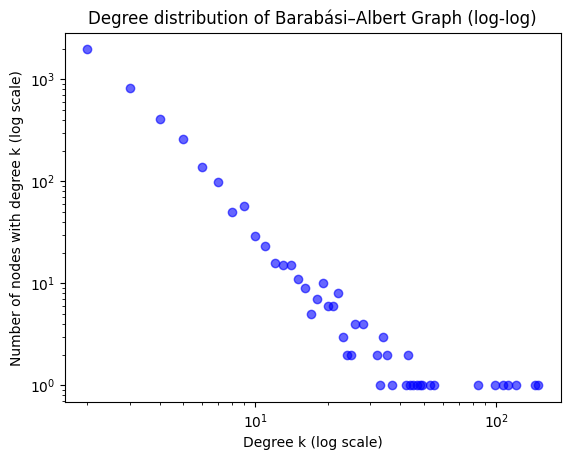

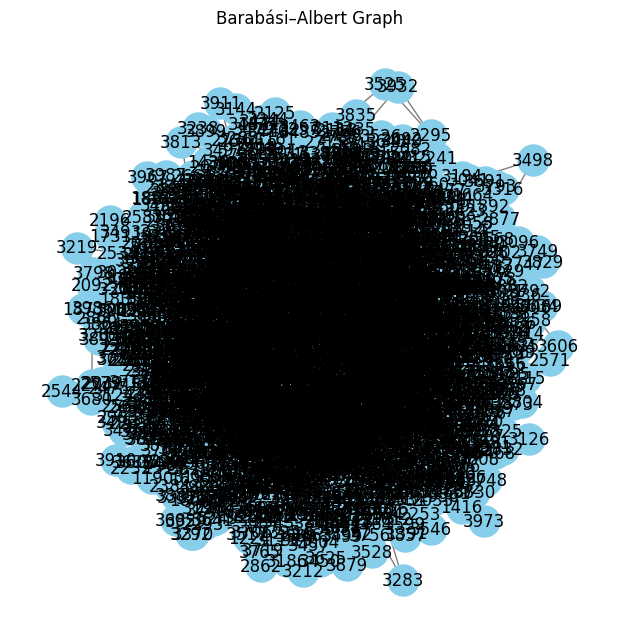


Community structure:
Detected 31 communities
Modularity: 0.5312


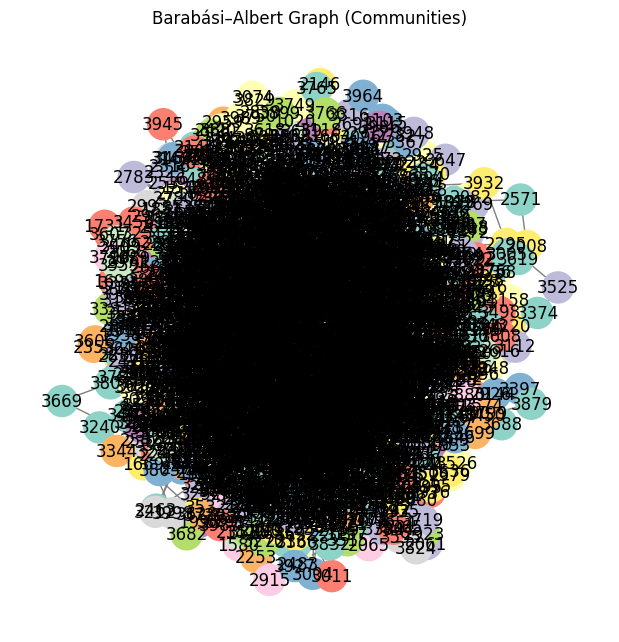

--- Watts–Strogatz Graph ---
Number of nodes: 4000
Number of edges: 8000
Average degree: 4.0
Max degree: 9
Min degree: 2
Average shortest path length: 7.575265066266566
Average clustering coefficient: 0.17887440476190478


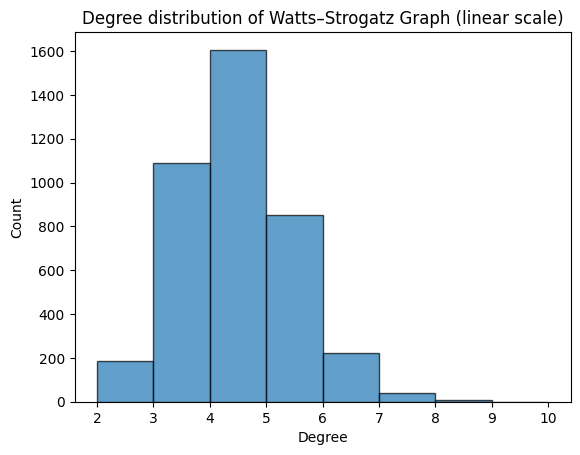

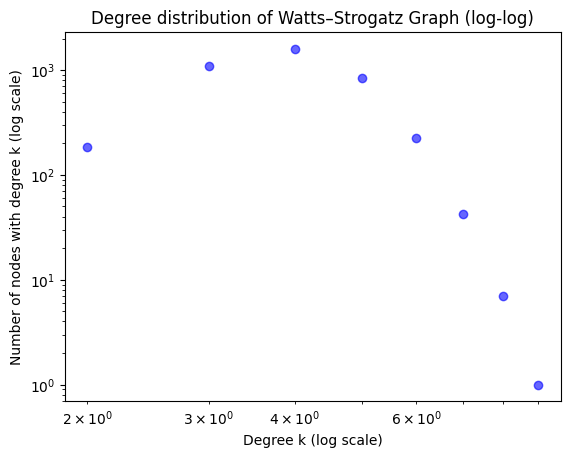

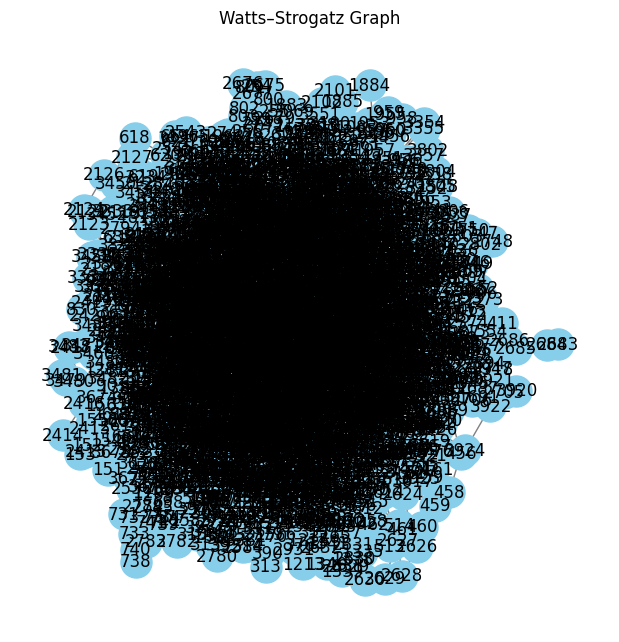


Community structure:
Detected 44 communities
Modularity: 0.7079


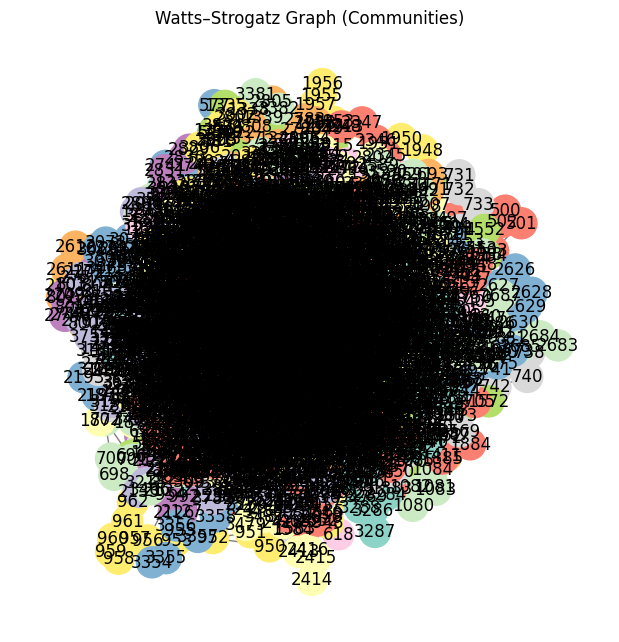

Graph loaded: 4039 nodes, 88234 edges
--- Graph ---
Number of nodes: 4039
Number of edges: 88234
Average degree: 43.69101262688784
Max degree: 1045
Min degree: 1
Average shortest path length: 3.6925068496963913
Average clustering coefficient: 0.6055467186200862


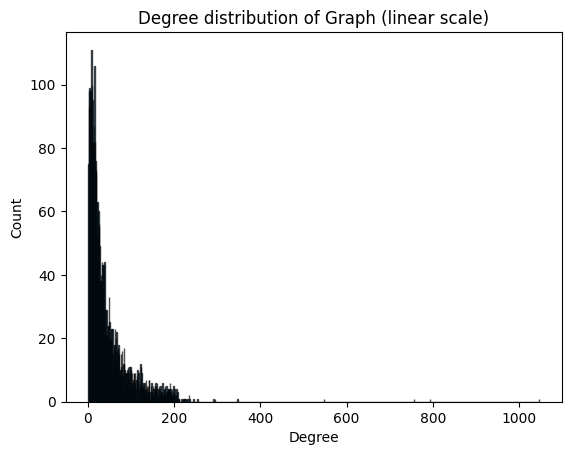

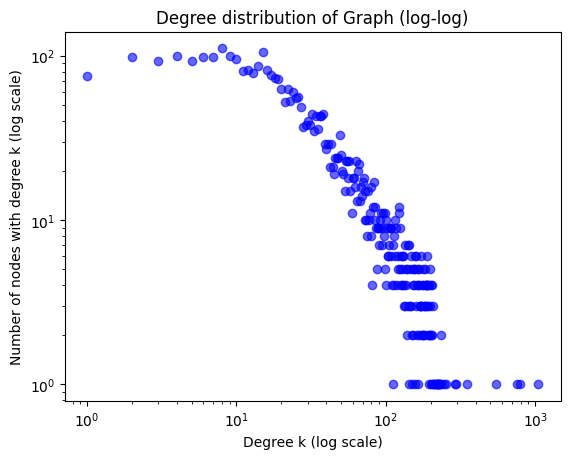

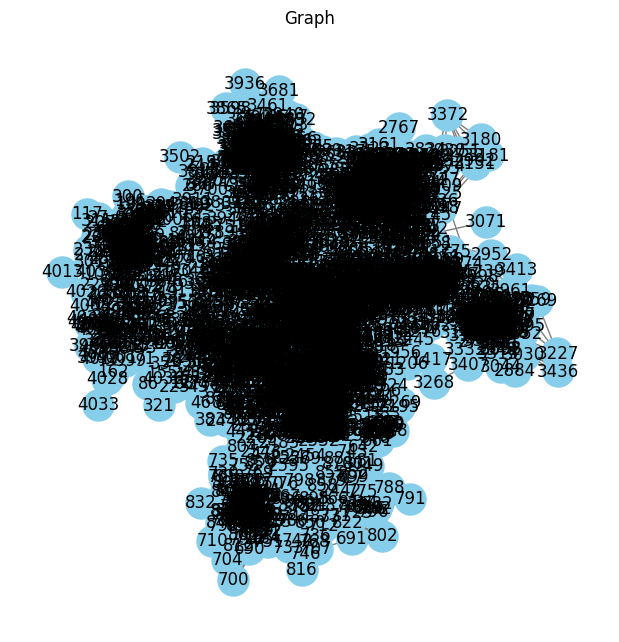


Community structure:
Detected 13 communities
Modularity: 0.7774


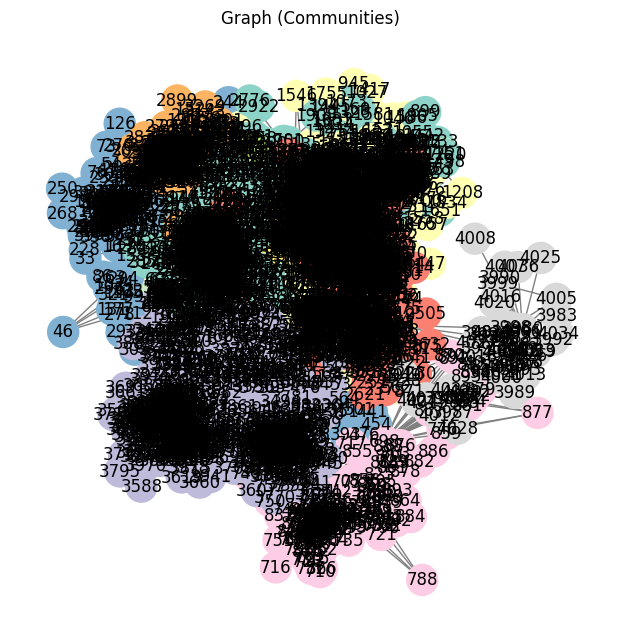

In [331]:
# Example: Create a real graph (you can replace this with your own)
G_real = ualis(4000,4)  # example graph
analyze_graph(G_real, "Colour Combination Collision")

# Erdős–Rényi graph
n = G_real.number_of_nodes()
p = 0.1  # probability of edge creation
G_er = nx.erdos_renyi_graph(n, p)
analyze_graph(G_er, "Erdős–Rényi Graph")

# Barabási–Albert graph
m = 2  # edges to attach from a new node
G_ba = nx.barabasi_albert_graph(n, m)
analyze_graph(G_ba, "Barabási–Albert Graph")

# Watts–Strogatz small-world graph
k = 4      # each node connected to k nearest neighbors
beta = 0.3  # rewiring probability
G_ws = nx.watts_strogatz_graph(n, k, beta)
analyze_graph(G_ws, "Watts–Strogatz Graph")

# Real world facebook dataset
G_fb = load_facebook_graph("facebook_combined.txt.gz")
analyze_graph(G_fb, "Facebook Social Circles")

--- Facebook Social Circles ---
Number of nodes: 4039
Number of edges: 88234
Average degree: 43.69101262688784
Max degree: 1045
Min degree: 1
Average shortest path length: 3.6925068496963913
Average clustering coefficient: 0.6055467186200862


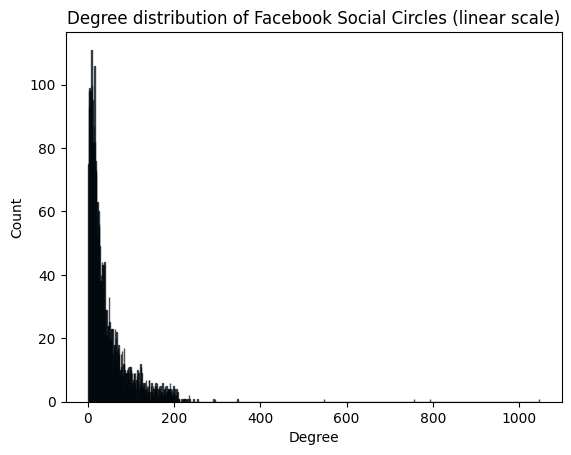

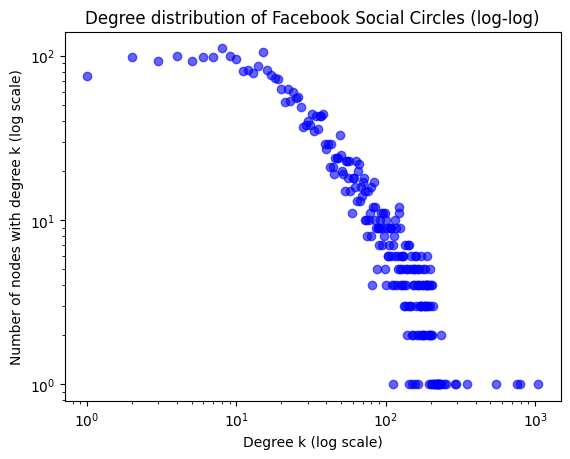

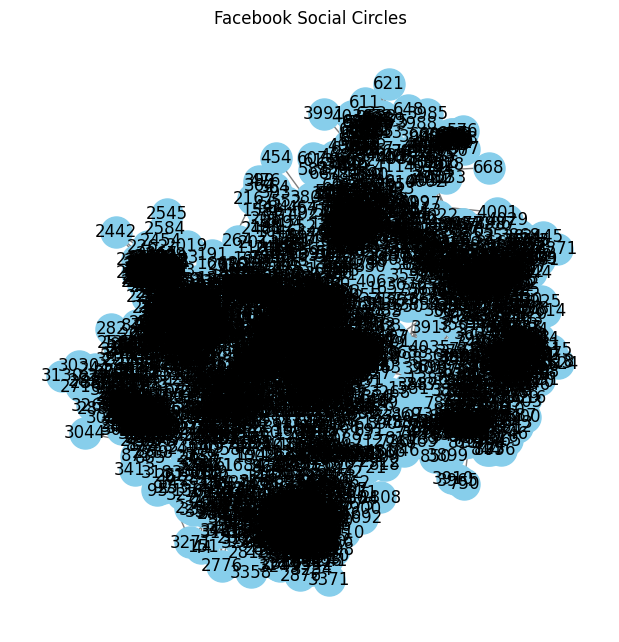


Community structure:
Detected 13 communities
Modularity: 0.7774


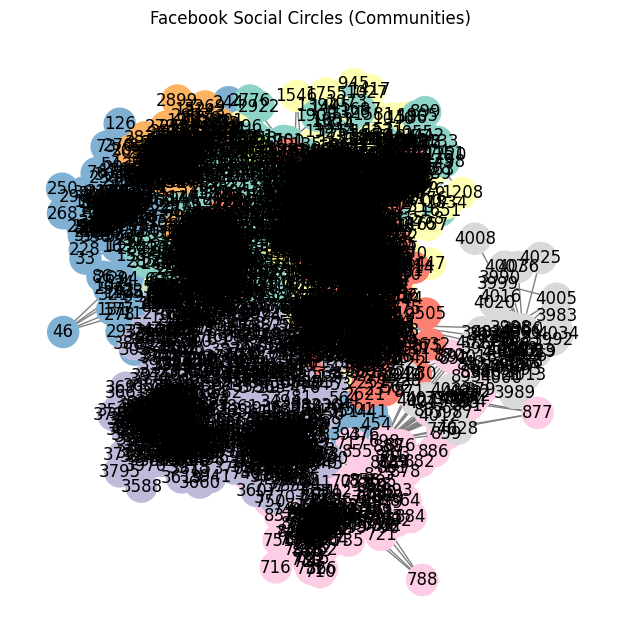

In [332]:
analyze_graph(G_fb, "Facebook Social Circles")

In [335]:
save_loglog_degree_plot(G_real, name="Colour Combination Collision", save_path="./figures/")
save_loglog_degree_plot(G_er, name="Erdős–Rényi", save_path="./figures/")
save_loglog_degree_plot(G_ba, name="Barabási–Albert", save_path="./figures/")
save_loglog_degree_plot(G_ws, name="Watts–Strogatz", save_path="./figures/")
save_loglog_degree_plot(G_fb, name="Facebook Social Circles", save_path="./figures/")

Saved log-log degree plot for Colour Combination Collision in ./figures/
Saved log-log degree plot for Erdős–Rényi in ./figures/
Saved log-log degree plot for Barabási–Albert in ./figures/
Saved log-log degree plot for Watts–Strogatz in ./figures/
Saved log-log degree plot for Facebook Social Circles in ./figures/


In [ ]:
alpha = 2.5   # power-law exponent
k_min = 1     # minimum k value
k_max = 1000  # maximum k value

# Generate k values
k = np.arange(k_min, k_max + 1)

# Compute unnormalized probabilities
P = k ** (-alpha)

# Normalize so that sum(P) = 1
P = P / np.sum(P)

# Plot
plt.figure(figsize=(7,5))
plt.loglog(k, P, 'r-', linewidth=2)
plt.title(f"Power Law Distribution: P(k) ∝ k^(-{alpha})")
plt.xlabel("k")
plt.ylabel("P(k)")
plt.grid(True, which="both", ls="--", alpha=0.5)
plt.show()
